<a href="https://colab.research.google.com/github/aicharya/ud120-projects/blob/master/feature_scaling/k_means_cluster.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!git clone https://github.com/aicharya/ud120-projects.git

Cloning into 'ud120-projects'...
remote: Enumerating objects: 88, done.
remote: Counting objects: 100% (88/88), done.
remote: Compressing objects: 100% (87/87), done.
remote: Total 5273 (delta 55), reused 0 (delta 0), pack-reused 5185
Receiving objects: 100% (5273/5273), 19.90 MiB | 21.11 MiB/s, done.
Resolving deltas: 100% (4506/4506), done.


In [2]:
import os
os.chdir('ud120-projects/feature_scaling')
os.listdir(os.getcwd())

['k_means_cluster.ipynb']

In [0]:
import pickle
import numpy
import matplotlib.pyplot as plt
import sys

sys.path.append("../tools/")

from feature_format import featureFormat, targetFeatureSplit

####some plotting code designed to help you visualize your clusters

In [0]:
def Draw(pred, features, poi, mark_poi=False, name="image.png", f1_name="feature 1", f2_name="feature 2"):
    """ some plotting code designed to help you visualize your clusters """

    ### plot each cluster with a different color--add more colors for
    ### drawing more than five clusters
    colors = ["b", "c", "k", "m", "g"]
    for ii, pp in enumerate(pred):
        plt.scatter(features[ii][0], features[ii][1], color = colors[pred[ii]])

    ### if you like, place red stars over points that are POIs (just for funsies)
    if mark_poi:
        for ii, pp in enumerate(pred):
            if poi[ii]:
                plt.scatter(features[ii][0], features[ii][1], color="r", marker="*")
    plt.xlabel(f1_name)
    plt.ylabel(f2_name)
    plt.savefig(name)
    plt.show()

#### load in the dict of dicts containing all the data on each person in the dataset

In [0]:
data_dict = pickle.load( open("../final_project/final_project_dataset.pkl", "r") )

##### there's an outlier--remove it! 

In [6]:
data_dict.pop("TOTAL", 0)

{'bonus': 97343619,
 'deferral_payments': 32083396,
 'deferred_income': -27992891,
 'director_fees': 1398517,
 'email_address': 'NaN',
 'exercised_stock_options': 311764000,
 'expenses': 5235198,
 'from_messages': 'NaN',
 'from_poi_to_this_person': 'NaN',
 'from_this_person_to_poi': 'NaN',
 'loan_advances': 83925000,
 'long_term_incentive': 48521928,
 'other': 42667589,
 'poi': False,
 'restricted_stock': 130322299,
 'restricted_stock_deferred': -7576788,
 'salary': 26704229,
 'shared_receipt_with_poi': 'NaN',
 'to_messages': 'NaN',
 'total_payments': 309886585,
 'total_stock_value': 434509511}

#### the input features we want to use 
#### can be any key in the person-level dictionary (salary, director_fees, etc.)

In [0]:
feature_1 = "salary"
feature_2 = "exercised_stock_options"
poi  = "poi"
features_list = [poi, feature_1, feature_2]
data = featureFormat(data_dict, features_list )
poi, finance_features = targetFeatureSplit( data )

In [0]:
#finance_features

#### in the "clustering with 3 features" part of the mini-project,
#### you'll want to change this line to 
#### for f1, f2, _ in finance_features:
#### (as it's currently written, the line below assumes 2 features)

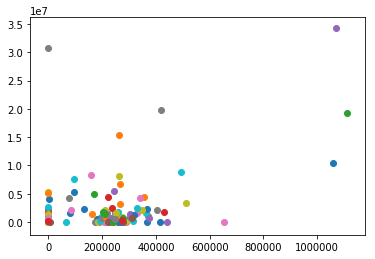

In [9]:
for f1, f2 in finance_features:
    plt.scatter( f1, f2 )
plt.show()

#### cluster here; create predictions of the cluster labels
#### for the data and store them to a list called pred


In [0]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=2, random_state=0)
kmeans = kmeans.fit(finance_features)
pred = kmeans.predict(finance_features)


In [11]:
pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int32)

#### rename the "name" parameter when you change the number of features
#### so that the figure gets saved to a different file

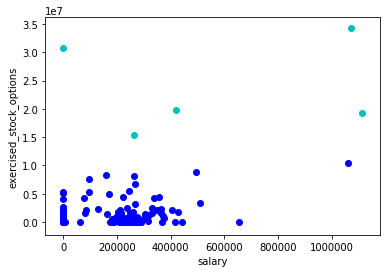

In [12]:
try:
    Draw(pred, finance_features, poi, mark_poi=False, name="clusters.pdf", f1_name=feature_1, f2_name=feature_2)
except NameError:
    print "no predictions object named pred found, no clusters to plot"

### Apply feature scaling on the “salary” and “exercised_stock_options” features (use only these two features)

#####What would be the rescaled value of a "salary" feature that had an original value of $200,000, and an "exercised_stock_options" feature of $1 million? 

In [38]:
from sklearn.preprocessing import MinMaxScaler
transformer = MinMaxScaler().fit(finance_features)
transformer.transform(finance_features)
# make sure that finance features is two features array
transformer.transform([[200000.0, 1000000.0]])

array([[0.17997621, 0.02911345]])

In [0]:
from sklearn.preprocessing import MinMaxScaler
scaled_features = MinMaxScaler().fit_transform(finance_features)
#scaled_features


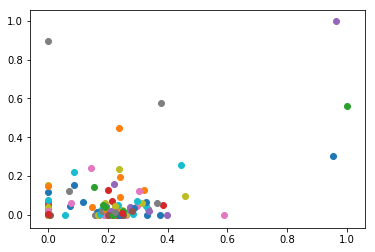

In [14]:
for f1, f2 in scaled_features:
    plt.scatter( f1, f2 )
plt.show()

In [0]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=2, random_state=0)
kmeans = kmeans.fit(scaled_features)
pred = kmeans.predict(scaled_features)

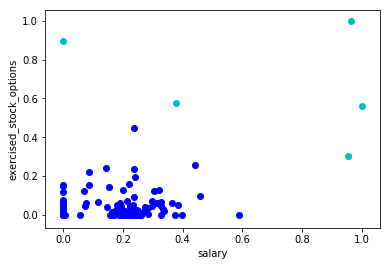

In [16]:
try:
    Draw(pred, scaled_features, poi, mark_poi=False, name="clusters.pdf", f1_name=feature_1, f2_name=feature_2)
except NameError:
    print "no predictions object named pred found, no clusters to plot"

###  What if we wanted to cluster based on “from_messages” (the number of email messages sent from a particular email account) and “salary”? Would feature scaling be unnecessary in this case, or critical?

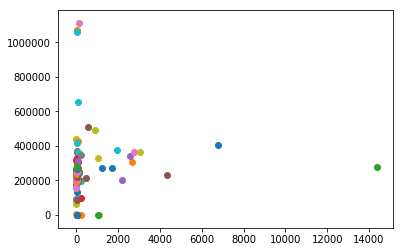

In [39]:
feature_1 = "from_messages"
feature_2 = "salary"
poi  = "poi"
features_list = [poi, feature_1, feature_2]
data = featureFormat(data_dict, features_list )
poi, finance_features = targetFeatureSplit( data )

for f1, f2 in finance_features:
    plt.scatter( f1, f2 )
plt.show()

#### 3 features clustering

In [0]:
feature_1 = "salary"
feature_2 = "exercised_stock_options"
feature_3 = "total_payments"
poi  = "poi"
features_list = [poi, feature_1, feature_2, feature_3]
data = featureFormat(data_dict, features_list )
poi, finance_features = targetFeatureSplit( data )

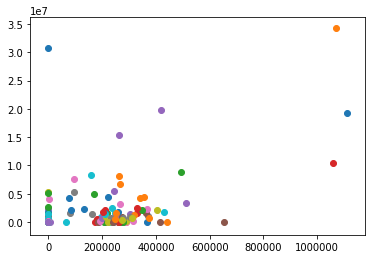

In [18]:
for f1, f2, f3 in finance_features:
    plt.scatter(f1, f2)
plt.show()

In [0]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=2, random_state=0)
kmeans = kmeans.fit(finance_features)
pred = kmeans.predict(finance_features)

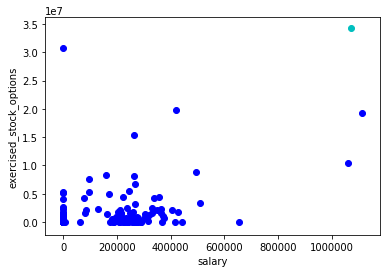

In [20]:
try:
    Draw(pred, finance_features, poi, mark_poi=False, name="clusters.pdf", f1_name=feature_1, f2_name=feature_2)
except NameError:
    print "no predictions object named pred found, no clusters to plot"

#### What are the maximum and minimum values taken by the “exercised_stock_options” feature used in this example?

In [21]:
exercised_stock_options = sorted([value['exercised_stock_options'] for value in data_dict.itervalues() if isinstance(value['exercised_stock_options'], int)])
print exercised_stock_options[-1], exercised_stock_options[0]

34348384 3285


#### What are the maximum and minimum values taken by “salary”?

In [22]:
salary = sorted([value['salary'] for value in data_dict.itervalues() if isinstance(value['salary'], int)])
print salary[-1], salary[0]

1111258 477
